# Teoria e Prática: Árvores de Decisão

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#  1) Explique como treinar e visualizar uma árvore de decisão para o exemplo de classes de pétalas de Iris (setosa, versicolor e virginica).

O conjunto de dados Iris é amplamente utilizado para demonstrar algoritmos de aprendizado de máquina. Para treinar uma árvore de decisão usando esse conjunto de dados, você precisa dividir os dados em um conjunto de treinamento e um conjunto de teste. Em seguida, você pode usar a implementação do algoritmo de árvore de decisão em uma biblioteca como o scikit-learn em Python para treinar o modelo.

Treinar e visualizar uma árvore de decisão para o exemplo das classes de pétalas de Iris é um processo relativamente simples, têm-se passos necessários:

Primeiro, precisará importar as bibliotecas necessárias e carregar os dados do conjunto de dados Iris. Você pode usar o conjunto de dados Iris que já está disponível no Scikit-learn. Em seguida, divida os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo após o treinamento. Após, pode criar o modelo de árvore de decisão e treiná-lo com os dados de treinamento. Após treinar o modelo, é importante avaliá-lo usando os dados de teste. Para visualizar a árvore de decisão, você pode usar a biblioteca `matplotlib` para plotar a estrutura da árvore.
Isso gerará um gráfico da árvore de decisão que você pode analisar para entender como o modelo toma decisões com base nos recursos. Precisa se lembrar sempre de que a profundidade da árvore de decisão e outros hiperparâmetros podem ser ajustados para otimizar o desempenho do modelo. Além disso, este é um exemplo simples de treinamento e visualização de uma árvore de decisão, e a técnica pode ser aplicada a conjuntos de dados mais complexos e variáveis de destino.

Aqui está um exemplo de código em Python usando o scikit-learn para treinar uma árvore de decisão com o conjunto de dados Iris:

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# Carregue o conjunto de dados Iris e separe as features (X) e os rótulos (y):
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

# Crie uma instância do classificador DecisionTreeClassifier com os parâmetros desejados,
# como a profundidade máxima da árvore (max_depth) e uma semente aleatória (random_state):
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Treine o classificador usando os dados de treinamento:
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

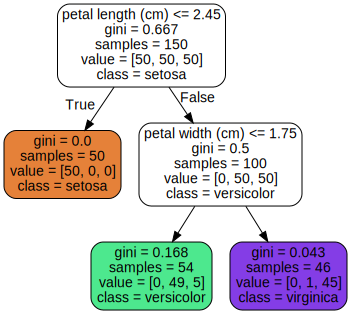

In [3]:
# Importe a função export_graphviz da biblioteca sklearn.tree
from sklearn.tree import export_graphviz

# - feature_names: nomes das características usadas na árvore (neste caso, "petal length (cm)" e "petal width (cm)")
# - class_names: nomes das classes alvo do seu problema (neste caso, as classes alvo do conjunto de dados Iris)
# - rounded: define se os retângulos que representam os nós da árvore devem ser arredondados
# - filled: define se os nós da árvore devem ser coloridos com base na classe predominante
export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # Lembre-se de ajustar o caminho e o nome do arquivo
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Importe a classe Source da biblioteca graphviz
from graphviz import Source

# Visualize a árvore de decisão usando o Graphviz:
# - Carregue o arquivo DOT gerado anteriormente
Source.from_file(IMAGES_PATH / "iris_tree.dot")


Pode visualizar a Árvore de Decisão utilizando o método `export_graphviz()`, que gera um arquivo de definição de grafo chamado "iris_tree.dot". Em seguida, você pode converter esse arquivo ".dot" em vários formatos, como PDF ou PNG, usando a ferramenta de linha de comando "dot" do pacote Graphviz. A linha de comando a seguir demonstra como converter o arquivo ".dot" em um arquivo de imagem ".png", como mostrado acima.


# 2) Em continuação, exemplifique como fazer previsões e estimativa de classe de probabilidades.

O código inicia com a criação de uma matriz de recursos, `X_iris_all`, que é construída a partir das combinações de valores de comprimento e largura da pétala. Em seguida, um modelo de árvore de decisão, `tree_clf`, é treinado usando esses recursos.Para visualizar as fronteiras de decisão da árvore de decisão, o código faz previsões para cada combinação possível de comprimento e largura da pétala, aplicando o método `predict` do objeto `tree_clf`. As previsões resultantes são remodeladas para coincidir com a forma da matriz de comprimentos e larguras, criando assim uma representação da separação de classes em todo o espaço de características.
Posteriormente, o código utiliza a função `contourf` do Matplotlib para gerar um gráfico de contorno. Esse gráfico usa as informações de comprimento, largura e as previsões para criar uma visualização das fronteiras de decisão da árvore de decisão. Isso ajuda a identificar como o modelo divide as diferentes classes de íris com base em suas características de comprimento e largura da pétala. Além disso, os dados de treinamento são plotados no gráfico com pontos amarelos, azuis e verdes, representando as diferentes classes de íris. Essa sobreposição dos pontos de dados no gráfico de contorno ajuda a entender como a árvore de decisão separa os dados de treinamento com base em suas características, oferecendo uma visualização clara das áreas de decisão do modelo.

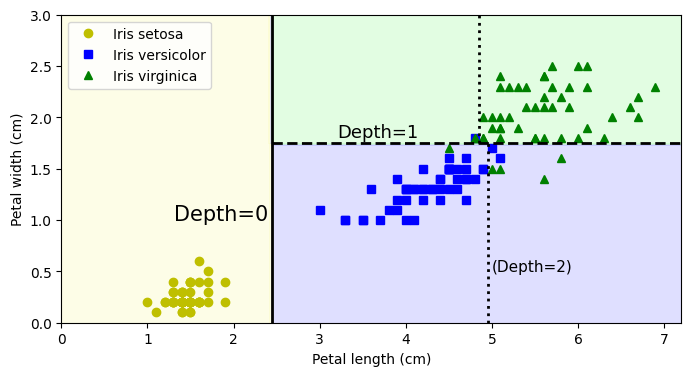

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
# Define uma paleta de cores personalizada para a plotagem das fronteiras de decisão
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
# Cria o comprimento e largura das petalas e faz a previsão
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
# Cria uma visualização das fronteiras de decisão da árvore
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# plota os dados de treinamento com pontos amarelos, azuis e verdes
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")


tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
# Obtém os valores de limiares para visualizar as divisões da árvore
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
# save_fig("decision_tree_decision_boundaries_plot")

plt.show()

A plotagem mostra as fronteiras de decisão da Árvore de Decisão. A linha vertical mais espessa representa a fronteira de decisão do nó raiz (profundidade 0), que ocorre no comprimento da pétala de 2,45 cm. A área à esquerda da linha é pura, contendo apenas amostras da classe Iris-Setosa, e, portanto, não pode ser subdividida ainda mais. No entanto, a área à direita é impura, contendo mais de uma classe, então o nó da profundidade 1 à direita o divide novamente com base no critério da largura da pétala (1,75 cm), conforme indicado pela linha tracejada. Com o parâmetro `max_depth` definido como 2, a Árvore de Decisão para nesse ponto. No entanto, se você aumentar o `max_depth` para 3, os dois nós da profundidade 2 criarão uma outra fronteira de decisão (representada pelas linhas pontilhadas), permitindo uma maior complexidade na representação das decisões no conjunto de dados. Isso ilustra como o ajuste do hiperparâmetro `max_depth` pode afetar a profundidade e a complexidade da árvore de decisão resultante.

In [5]:
# Acessa o objeto que representa a estrutura interna da árvore de decisão
# tree_clf é o modelo da árvore de decisão treinado
# tree é uma variável que recebe a estrutura da árvore interna para posterior análise
tree = tree_clf.tree_


Uma árvore de decisão não só pode prever a classe de uma instância, mas também estimar a probabilidade dessa instância pertencer a uma classe específica. Isso é feito seguindo a árvore até um nó folha correspondente à instância e, em seguida, retornando a proporção das instâncias de treinamento de cada classe nesse nó.

Cada chamada para `tree_clf.predict_proba` fornece as probabilidades de pertencer a cada classe com base nas características da instância. Nesse caso, as classes de íris, setosa (amarela), versicolor (verde) e virginica (azul), são previstas com base em seu tamanho.

Isso significa que não apenas você pode obter a classe de uma instância, mas também entender quão confiável é essa previsão em termos de probabilidades. É uma característica valiosa das árvores de decisão, especialmente quando a classificação não é uma decisão binária, e a incerteza é uma parte importante da análise.

In [6]:
# Realiza uma previsão de probabilidade usando o modelo tree_clf para um exemplo de entrada ([2, 1.5])
# O resultado é um array de probabilidades que representa a chance de pertencer a cada classe
# O método .round(3) é usado para arredondar as probabilidades para três casas decimais
tree_clf.predict_proba([[2, 1.5]]).round(3)

array([[1., 0., 0.]])

In [7]:

tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:

tree_clf.predict_proba([[5, 2]]).round(3)

array([[0.   , 0.022, 0.978]])

In [ ]:
tree_clf.predict([[2, 1.5]])

array([0])

In [ ]:

tree_clf.predict([[5, 1.5]])

array([1])

In [ ]:

tree_clf.predict([[5, 2]])

array([2])

# 3) Do que se trata "Regularização de Hyperparâmetros"? Demonstre em exemplificação.
A regularização de hiperparâmetros é um processo de ajuste dos parâmetros do modelo de aprendizado de máquina para melhorar o desempenho e evitar problemas como overfitting (sobreajuste). Na árvore de decisão, alguns dos hiperparâmetros que podem ser regularizados incluem a profundidade máxima da árvore, o número mínimo de amostras necessárias para dividir um nó e o número mínimo de amostras necessárias em um nó folha.

Para demonstrar a regularização de hiperparâmetros, você pode usar técnicas como a validação cruzada (cross-validation) para encontrar a combinação ideal de valores de hiperparâmetros que resultam no melhor desempenho do modelo. Essas técnicas envolvem dividir os dados em diferentes conjuntos de treinamento e teste e avaliar o desempenho do modelo em cada divisão. E em Python, você pode usar bibliotecas como o scikit-learn para realizar esse processo usando funções como GridSearchCV ou RandomizedSearchCV, que permitem explorar diferentes combinações de hiperparâmetros e encontrar a melhor configuração.

A biblioteca scikit-learn fornece funcionalidades para otimização de hiperparâmetros, como o GridSearchCV, que realiza uma busca exaustiva pelos melhores valores de hiperparâmetros em uma grade predefinida.

In [9]:
from sklearn.datasets import make_moons
# Gerar dados com formato de duas luas
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
# Criar duas instâncias de DecisionTreeClassifier com diferentes hiperparâmetros
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
# Treinar os classificadores nos dados de exemplo
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

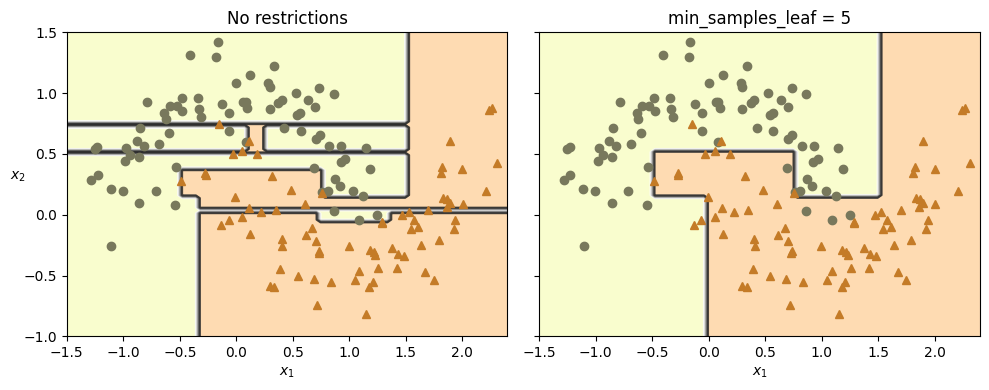

In [10]:

# Função auxiliar para plotar a fronteira de decisão
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

# Criar uma figura com dois subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# Plotar a fronteira de decisão do primeiro classificador sem restrições
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
# Plotar a fronteira de decisão do segundo classificador com min_samples_leaf=5
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

A plotagem exibe duas Árvores de Decisão treinadas no conjunto de dados "luas". Na árvore à esquerda, a Árvore de Decisão é treinada com os hiperparâmetros padrão, o que significa sem restrições significativas. Na árvore à direita, a Árvore de Decisão é treinada com a configuração de `min_samples_leaf = 4`. A diferença é notável: o modelo à esquerda parece estar sofrendo de sobreajuste, enquanto o modelo à direita provavelmente terá uma melhor capacidade de generalização para novos dados. O modelo da árvore à esquerda, sem restrições, se adaptou muito bem ao conjunto de treinamento, capturando até mesmo os detalhes mais sutis, o que levou a um ajuste excessivo. Isso significa que ele pode não ser capaz de lidar com novos dados de maneira eficaz, já que está muito específico para o conjunto de treinamento. Por outro lado, o modelo da árvore à direita, com o hiperparâmetro `min_samples_leaf` definido como 4, impõe uma restrição que requer que cada folha da árvore tenha pelo menos 4 amostras. Isso resulta em uma árvore mais simples e menos propensa ao sobreajuste, tornando-o uma escolha mais adequada para generalizar bem em dados não vistos.

In [11]:
# Gerar um conjunto de teste separado
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
# Calcula a pontuação (score) do primeiro classificador (tree_clf1) no conjunto de teste
# A pontuação reflete o desempenho do primeiro classificador nos dados de teste
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [12]:
# Calcula a pontuação (score) do segundo classificador (tree_clf2) no conjunto de teste
# - X_moons_test: conjunto de teste de características
# - y_moons_test: conjunto de teste de rótulos (classes)
# A pontuação reflete o desempenho do classificador nos dados de teste
tree_clf2.score(X_moons_test, y_moons_test)

0.92

A regularização de hiperparâmetros refere-se a técnicas utilizadas para controlar a complexidade de um modelo de aprendizado de máquina, a fim de evitar overfitting. Um exemplo de regularização de hiperparâmetros em árvores de decisão é o parâmetro de profundidade máxima (max_depth).
A profundidade máxima controla o número máximo de níveis na árvore de decisão. Limitar a profundidade máxima pode evitar que a árvore se torne muito complexa e sobreajustada aos dados de treinamento.